In [180]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import tifffile
from PIL import Image
import os
import numpy as np
import time
import re
from skimage import data, color
import scipy.ndimage as ndimage
import h5py
import scipy.io as spio
import sys
import seaborn
seaborn.set(font_scale=2)
seaborn.set_style('whitegrid')
clrs = seaborn.color_palette()
from multiprocessing.dummy import Pool 

sys.path.append('/home/yves/Documents/')
import twoptb as MP



In [181]:
animal_name = 'Road_Runner_GP'
HDF_File,file_path = MP.file_management.create_base_hdf(animal_ID=animal_name,file_loc='/media/yves/Storage 2/' )

File already exists if you proceed you will overwrite 
 are you sure you would like to proceed
type yes if you would like to proceed otherwise press enter
File not overwritten, returning handle to existing file


In [182]:
session_ID = '20160216'

In [7]:
HDF_File = MP.file_management.add_session_groups(file_handle = HDF_File,
                                                 session_ID=session_ID)

In [192]:
#directory containing all the directories containing all tiff files from that day
#baseDir = r'l:\Tonotopy_Mapping\Bernie-Tonemapping\\'
baseDir = r'/media/yves/Samuel/Raw/20160216/Area01/'


fs = os.listdir(baseDir) # all directories in that directory
file_Dirs = fs
#now use regex to filter which files we want to register
#file_Dirs = [re.findall(r'(.*Mapping_Area[0-9]{1,3})',name) for name in fs if re.findall(r'.*(Mapping_Area[0-9]{1,3})',name)!=[]]
file_Dirs

['(20160216_17_38_29)-_MouseOnWheelzoom2_tones1',
 '(20160216_17_48_00)-_MouseOnWheelzoom2_tones2',
 '(20160216_17_59_00)-_MouseOnWheelzoom2_tones3']

In [12]:
st = time.time()
MP.file_management.add_raw_series(baseDir=baseDir,
                                  file_Dirs=file_Dirs,
                                  HDF_File=HDF_File,
                                  session_ID=session_ID)

print time.time() - st

Load Data 0 Time: 114.468129873
Load HDF5 0 Time: 9.53674316406e-07
(20160216_17_38_29)-_MouseOnWheelzoom2_tones1
Write 0 Time: 67.737899065
Write to Disk 0 Time: 1.40594577789
Load Data 1 Time: 112.050406933
Load HDF5 1 Time: 0.000370025634766
(20160216_17_48_00)-_MouseOnWheelzoom2_tones2
Write 1 Time: 65.9960110188
Write to Disk 1 Time: 0.790565013885
Load Data 2 Time: 112.317018032
Load HDF5 2 Time: 0.000377893447876
(20160216_17_59_00)-_MouseOnWheelzoom2_tones3
Write 2 Time: 66.2752811909
Write to Disk 2 Time: 0.445652961731
541.770373106


In [ ]:
HDF

In [3]:
HDF_File = h5py.File(file_path,'a',libver='latest')

NameError: name 'file_path' is not defined

In [183]:
areas = HDF_File[session_ID]['raw_data'].keys()

In [738]:
areD_0 = np.array(HDF_File[session_ID]['raw_data'][areas[1]])

In [739]:
#areD_2 =  ndimage.gaussian_filter(areD_0, sigma=(5, 5, 0), order=0)

In [ ]:
def gauss_smooth(inArr):
    return ndimage.gaussian_filter(im.astype('float'), sigma=(8, 8), order=0)

In [ ]:
import multiprocessing
p = multiprocessing.Pool(2)
p.map(mp_worker, data)

In [740]:
for idx,im in enumerate(areD_0):
    if np.remainder(idx,200)==0:
        print idx
    areD_0[idx] = ndimage.gaussian_filter(im.astype('float'), sigma=(8, 8), order=0)

0
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400


In [741]:
areaD_s = areD_0[:,1::2,1::2][:,1:,1:]

In [742]:
areaD_s.shape

(13500, 255, 255)

In [743]:
from skimage.measure import block_reduce
st = time.time()
#areaD_s = block_reduce(areD_0[:,1:-1,1:-1], block_size=(1,5,5), func=np.mean)
print time.time() - st

0.000102043151855


In [744]:
def smooth_matlab(arr,n=500):
    ret = np.cumsum(arr,axis=0).astype('float')
    offset = int(n/2)
    ret[offset:-offset] = ret[n:] - ret[:-n]
    ret[offset:-offset] /= n
    ret[:offset] = ret[offset +1]
    ret[-offset:] = ret[-offset-1]
    print ret.shape
    return ret

In [745]:
st = time.time()
areaD_s_tempF = smooth_matlab(np.array(areaD_s))
print time.time() - st

(13500, 255, 255)
24.8937661648


In [746]:
"""areaD_s_tempF = np.zeros(areaD_s.shape)

for i in range(areaD_s.shape[1]):
    
    if np.remainder(i,10)==0:
        print i
    for j in range(areaD_s.shape[2]):
        areaD_s_tempF[:,i,j] -= MP.process_data.runkalman(areaD_s[:,i,j].astype('float'),RQratio=20000)"""
print 'ho'

ho


In [747]:
areaD_s2 = areaD_s - areaD_s_tempF

(2000, 7000)

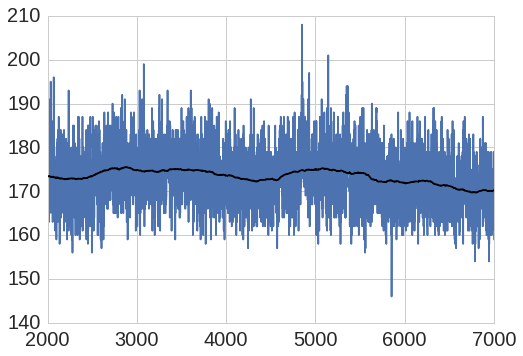

In [748]:
plt.plot(areaD_s_tempF[:,22,18],zorder=10,color='k')
#plt.plot(areaD_s_tempF[:,22,18])
plt.plot(areaD_s[:,22,18])
plt.xlim(2000,7000)

# Now get Design Matrix

In [749]:
ls '/media/yves/Storage 2/Road_Runner_GP/'

Road_Runner_GP.h5*
search_tones_outDat_2016_2_16_17_38_0.mat*
search_tones_outDat_2016_2_16_17_47_30.mat*
search_tones_outDat_2016_2_16_17_58_33.mat*


In [767]:
import scipy.io as spio
#matFilePth = '/media/yves/Storage 2/Road_Runner_GP/search_tones_outDat_2016_2_16_17_38_0.mat'
matFilePth = '/media/yves/Storage 2/Road_Runner_GP/search_tones_outDat_2016_2_16_17_47_30.mat'

grabI = MP.file_management.load_images.load_GRABinfo(spio.loadmat(matFilePth,struct_as_record=False, squeeze_me=True)['outDat'])

In [768]:
frqs = np.logspace(np.log10(1000),np.log10(80000),num=24)#np.unique(grabI['stimMat'][:,0])
nFreqs = len(frqs)
print nFreqs

24


In [769]:
nFrames = len(grabI['trialOrder'])*45

In [770]:
np.unique(np.round(groupedStims-.5)/2)

array([ -0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.])

In [771]:
#This averages responses to stimuli across levels
groupedStims = np.floor((grabI['trialOrder']-1)/4)

nOccs = [] #number of occurrences
for i in np.unique(groupedStims):
    nOccs.append(np.sum(groupedStims==i))
#assert all(np.array(nOccs)==24), "Something went wrong with your extraction"


In [772]:
nFrames = areaD_s.shape[0]

In [884]:
DM = np.zeros([int(np.max(groupedStims)+1),int(nFrames)])

for stim_type in range(int(np.max(groupedStims).astype('int')+1)):
    stimLocs = np.where(groupedStims==stim_type)[0]
    for loc in stimLocs:
        DM[int(stim_type),int(loc*45)] = 1

In [885]:
DM.shape

(25, 13500)

-254.62

In [924]:
from scipy.stats.mstats import zscore
st = time.time()
z_inp = zscore(np.sqrt(areaD_s2+np.abs(np.min(areaD_s2))),axis=0)   #square root to normalise count statistics
print time.time() - st

61.5197989941


In [887]:
resps = np.zeros([areaD_s.shape[1],
                  areaD_s.shape[2],
                  int(np.max(groupedStims)+1),12])

bF = np.array([.1,.2,.4,.5,.7,1,1,1,1,1,1,1,1,.975,.9,.85,.8,.75,.7,.5,.4,.2,.1,0])#np.linspace(18,0,num=10)
#bF = np.ones(10)
bF /= np.sum(bF)
for idx in range(DM.shape[0]):
    
    DM[idx] = np.convolve(bF,DM[idx],mode='full')[:-(len(bF)-1)]

for stim_type in range(int(np.max(groupedStims).astype('int'))):
    stimLocs = np.where(groupedStims==stim_type)[0]
    for i,idx in enumerate(stimLocs):
        resps[:,:,int(stim_type),i] = np.mean(z_inp[idx:idx+len(bF)]*bF[:,None,None],axis=0)

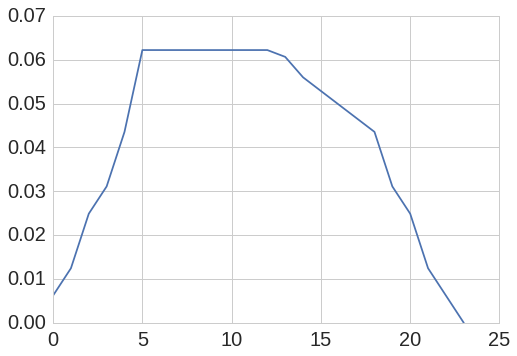

In [912]:
plt.plot(bF)

In [889]:
DM = np.vstack([np.ones(DM.shape[1]),DM])

In [890]:
#inv = np.linalg.inv(DM.T.dot(DM) + np.random.normal(loc=0,scale=.001,size=[13500,13500])).dot(DM.T).T
inv = np.linalg.inv(DM.dot(DM.T)) # this is not the real thing, this is different
inv2 = np.linalg.inv(DM.dot(DM.T)).dot(DM)

In [807]:
%%timeit
inv.dot(areaD_s2[:,i,j])

The slowest run took 825.70 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 61.2 µs per loop


In [841]:
np.allclose(DM.dot(DM.T),DM.T.dot(DM))

ValueError: operands could not be broadcast together with shapes (27,27) (13500,13500) 

In [956]:
newZ = smooth_matlab(z_inp,12)

(13500, 255, 255)


(0, 500)

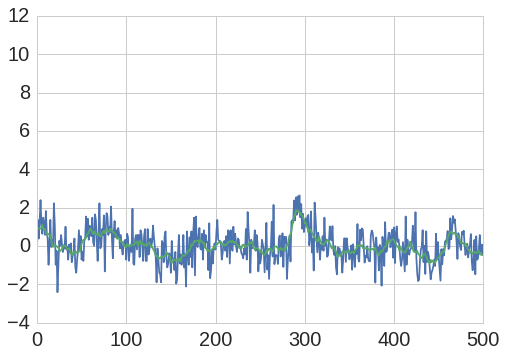

In [957]:
plt.plot(z_inp[:,xidx,yidx])
plt.plot(newZ[:,xidx,yidx])

plt.xlim(0,500)

In [958]:
final = np.zeros(areaD_s2.shape[1:])
for i in range(final.shape[0]):
    #print i
    for j in range(final.shape[1]):
        final[i,j] = np.argmax(inv2.dot(newZ[:,i,j]))

(500, 4500)

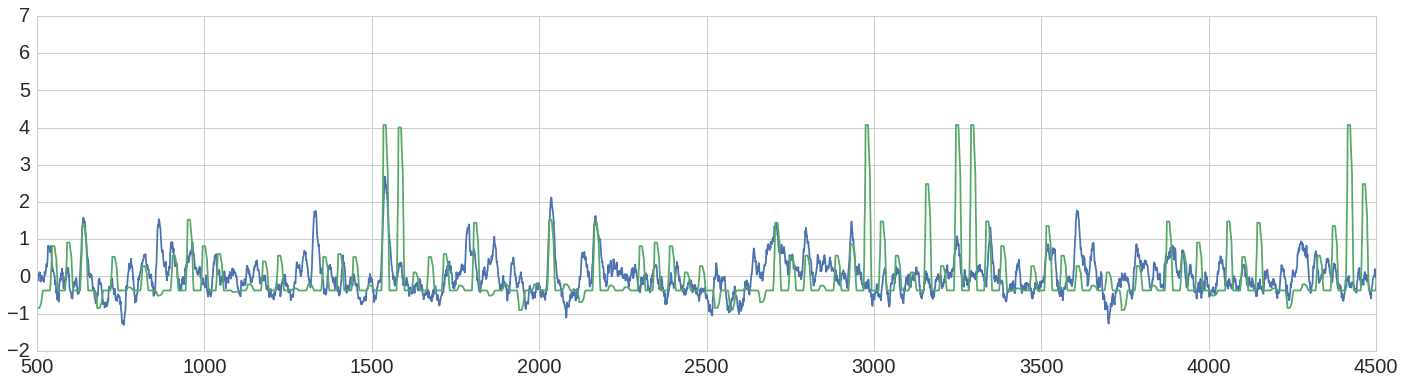

In [969]:
xidx = 45
yidx = 33
b = np.linalg.inv(DM.dot(DM.T)).dot(DM).dot(newZ[:,xidx,yidx])

plt.figure(figsize=(24,6))
plt.plot(newZ[:,xidx,yidx])
plt.plot(5*DM.T.dot(b))
plt.xlim(500,4500)

### Make  a nice little plot

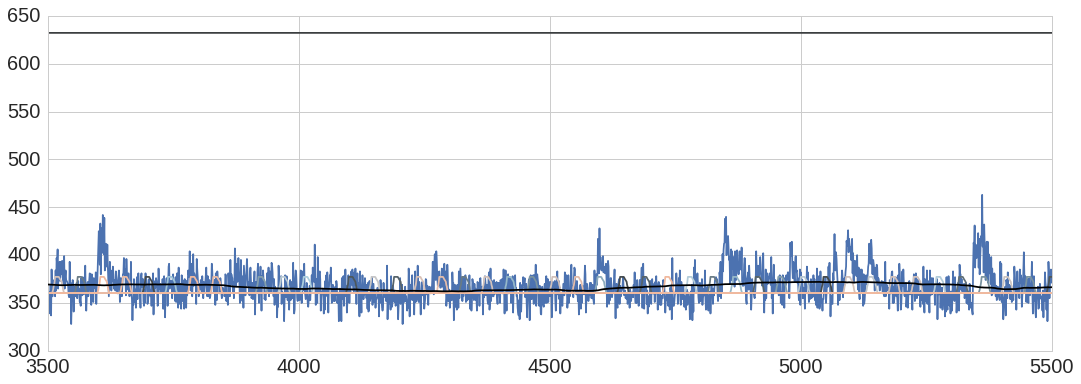

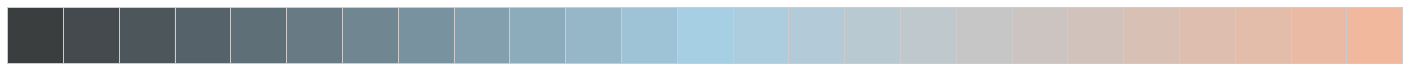

In [941]:
plt.figure(figsize=(18,6))

xidx = 44
yidx = 49
plt.plot(areaD_s_tempF[:,xidx,yidx],zorder=10,color='k')
#plt.plot(areaD_s_tempF[:,22,18])
plt.plot(areaD_s[:,xidx,yidx])
plt.xlim(2000,7000)
clrs = seaborn.color_palette('RdBu_d',n_colors=25)
for clr,i in zip(clrs,DM):
    stimls = np.where(i)
    plt.plot(i*(np.max(areaD_s[:,xidx,yidx])-np.min(areaD_s[:,xidx,yidx])) + np.mean(areaD_s[:,xidx,yidx]),
             color=clr)
    #for i in stimls:
        #plt.vlines(i,np.min(areaD_s[:,43,18]),np.max(areaD_s[:,43,18]),color=clr,linewidth=0.7)
        #plt.plot(i*(np.max(areaD_s[:,43,18])-np.min(areaD_s[:,43,18])) + np.min(areaD_s[:,43,18]))
plt.xlim(3500,5500)

seaborn.palplot(clrs)


In [945]:
maxs = np.zeros([areaD_s.shape[1]+1,
                areaD_s.shape[2]+1])
alphas = np.zeros([areaD_s.shape[1]+1,
                  areaD_s.shape[2]+1])
for i in range(areaD_s.shape[1]):
    
    for j in range(areaD_s.shape[2]):
        maxs[i,j] = np.argmax(np.mean(np.squeeze(resps[i,j]),axis=1))
        alphas[i,j] = 1 if (np.max(np.mean(np.squeeze(resps[i,j]),axis=1)) -
                            np.mean(np.mean(np.squeeze(resps[i,j]),axis=1)))>.005 else 0
        

In [962]:
maxs = final

In [967]:
alphas = np.var(newZ,axis=0)>0.4

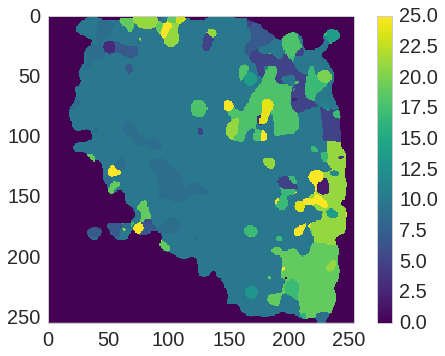

In [966]:
plt.imshow(maxs*alphas,interpolation='None',cmap='viridis')
plt.grid()
plt.colorbar()

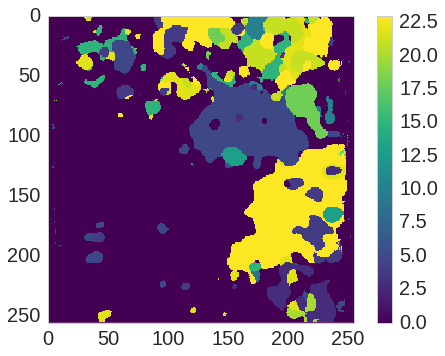

In [766]:
plt.imshow(maxs*alphas,interpolation='None',cmap='viridis')
plt.grid()
plt.colorbar()

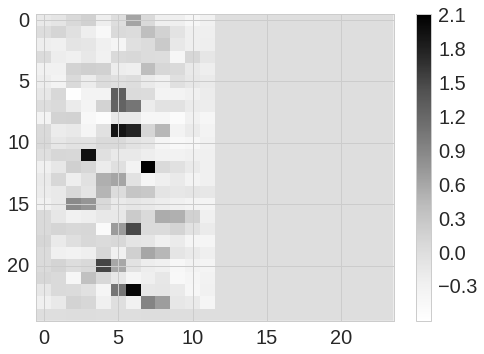

In [39]:
plt.imshow(np.squeeze(resps[20,20]),aspect='auto',interpolation='none')
plt.colorbar()

In [132]:
plt.imshow(np.squeeze(resps[60,60]),aspect='auto',interpolation='none')
plt.colorbar()

IndexError: index 60 is out of bounds for axis 0 with size 51

In [10]:
bF = np.ones(10)
bF /= np.sum(bF)
for idx in range(DM.shape[0]):
    
    DM[idx] = np.convolve(bF,DM[idx],mode='full')[:-(len(bF)-1)]

NameError: name 'DM' is not defined

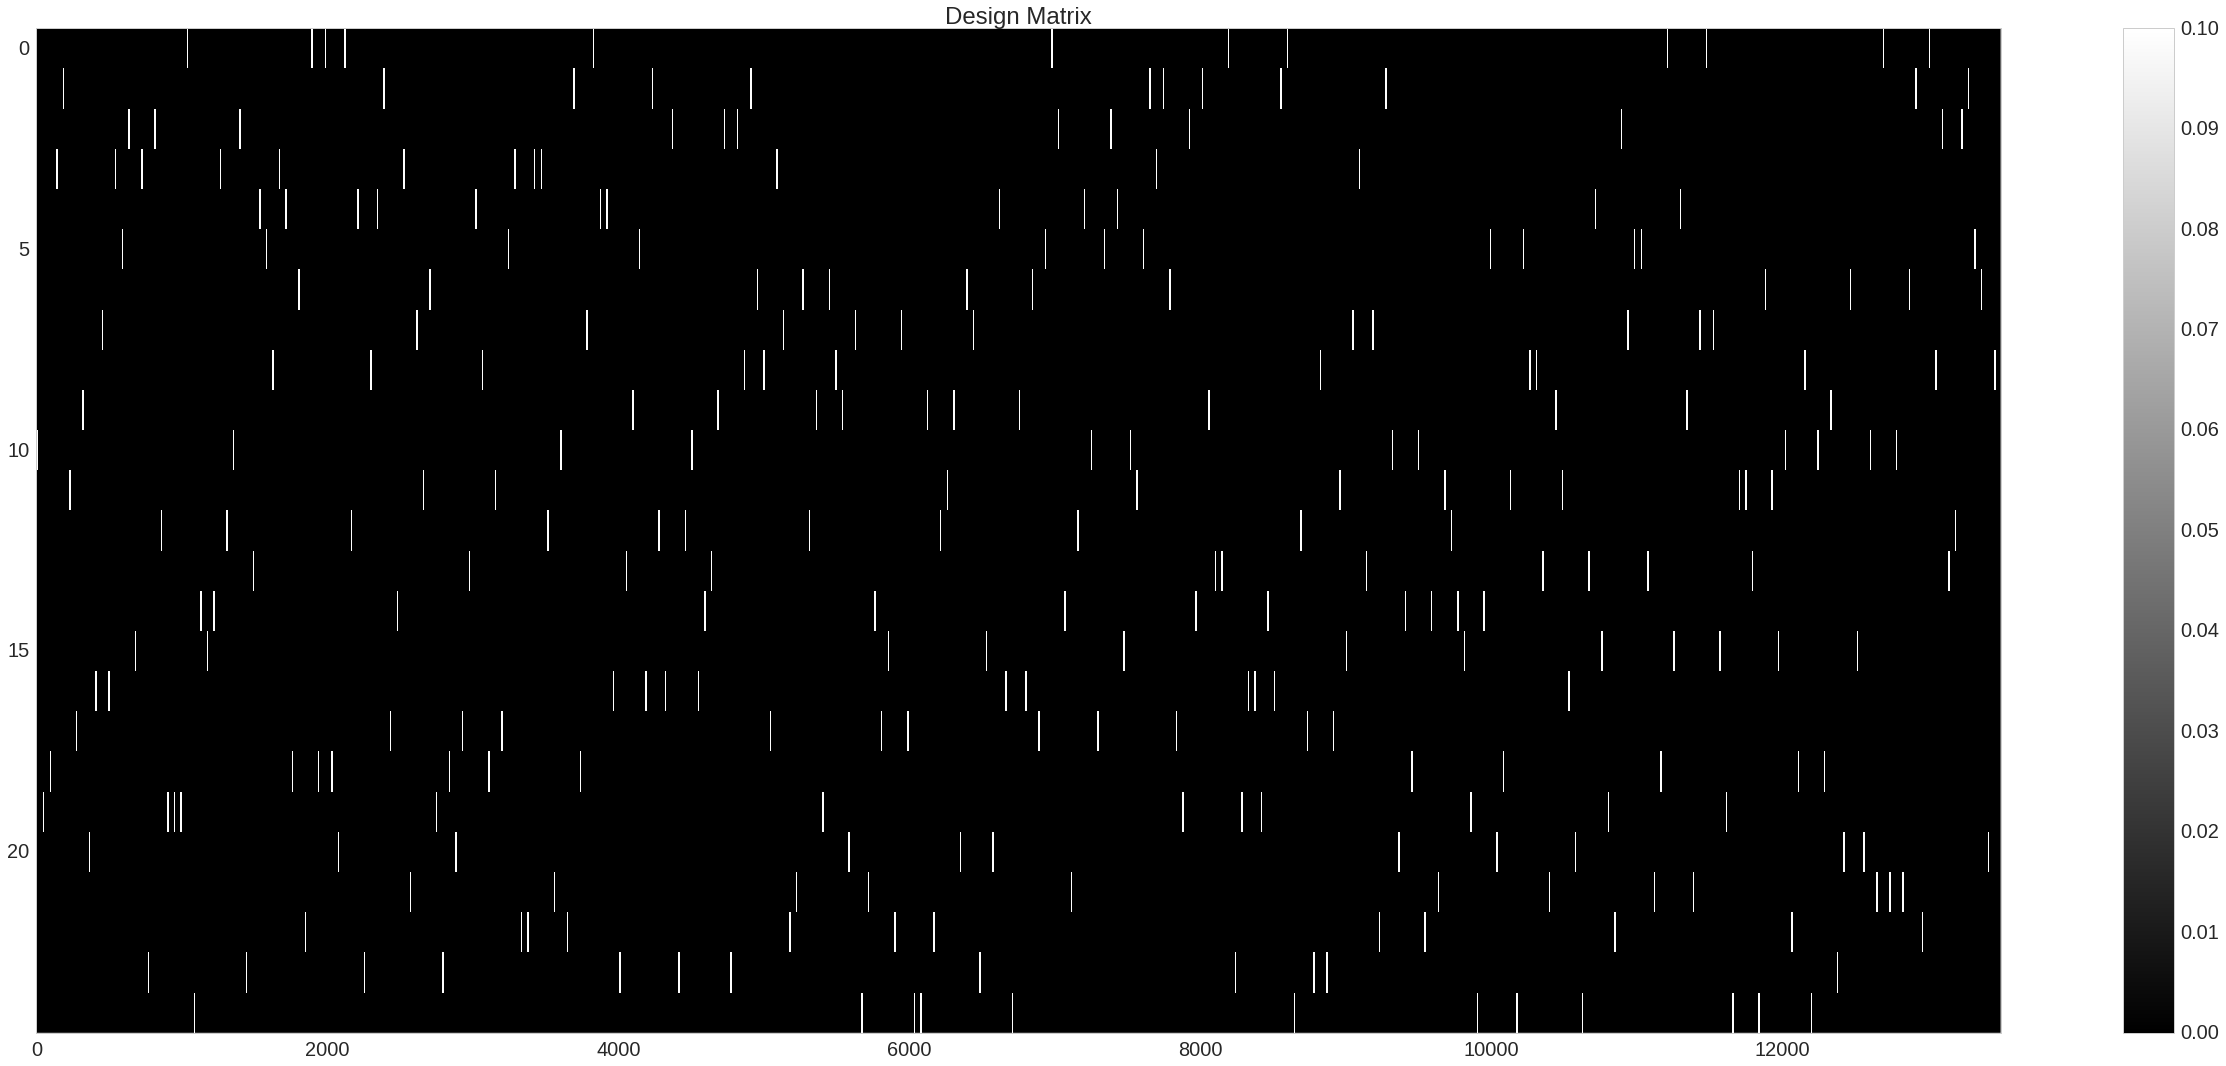

In [40]:
plt.figure(figsize=(44,18))


plt.title('Design Matrix')

plt.imshow(DM,aspect='auto',cmap='binary_r',interpolation='none')
plt.colorbar()
plt.grid()

## From the Design Matrix extract the responses for each neuron at each pixel

# Now fit a population of neurons in a vectorised operation

In [163]:
class population_RFs(object):
    
    """ define a population of neurons for inference of receptive fields using bayesian
        linear regression """
    
    def __init__(self):

        self.neurons = {}

    def add_neuron(self, neuron, neuron_id):
        
        self.neurons[neuron_id] = neuron
        
        

In [164]:
pRF = population_RFs()

In [170]:
for i in range(20):

    resps,x,y,g = sample_neuron(best_resp=i,
                                noiseVar=np.abs(np.random.normal(loc=1,scale=.2,size=1)),
                                sigma=1,
                                nRepeats=5,
                                plot=False,
                                maxA=np.random.randint(1,9,size=1))
    
    
    neuron = {'resps':resps,
              'x': x,
              'y': y,
              'g': g}
    pRF.add_neuron(resps,i)


phi_params = np.linspace(0,13,num=24)
#x_locs = [i[0] for i in resps]
X = project_X(phi_params,x_locs).T

In [215]:
n_neurons = 20
stim_dim = 24
#Here M is an (n_neurons x stim_dimensions) matrix
M = np.random.random(size=(n_neurons,stim_dim))*3

In [229]:
m = M.flatten(order='F')

In [230]:
X[:,0].dot(M[0])

1.9474610391231515

In [231]:
M[0].dot(X[:,0])

1.9474610391231515

In [232]:
#This is the stimulus projection into basis space in a cool way across neurons
Vi = np.kron(X[:,0],np.eye(20))
np.dot(Vi,m)

array([ 1.94746104,  3.55451931,  1.3344038 ,  1.74193933,  1.82143514,
        2.28578246,  2.5915893 ,  1.79514224,  1.06050725,  0.6364206 ,
        1.39033298,  0.44529832,  3.51947042,  2.0677838 ,  2.67488215,
        0.2991695 ,  3.82257285,  2.75607158,  2.10272735,  2.00085598])

In [187]:
#This is the basis projection of the response to one stimulus
print np.kron(X[:,0],np.eye(20))

[[ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


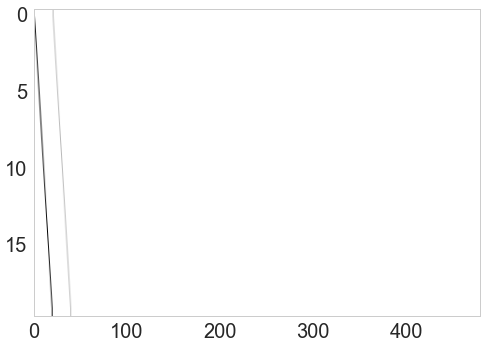

In [189]:
plt.imshow(np.kron(X[:,0],np.eye(20)),aspect='auto')
plt.grid()

In [233]:
a = np.array([[1,2], [3,4]])

In [235]:
print a

[[1 2]
 [3 4]]


In [234]:
a.flatten(order='F')

array([1, 3, 2, 4])

In [208]:
839801

839801

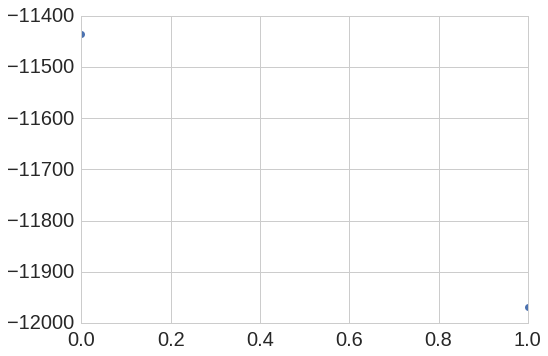

In [205]:
plt.plot([-11436,-11970],'o')
plt.ylabel

In [206]:
np.log(1)

0.0

In [207]:
np.log(0.0001)

-9.2103403719761818

In [39]:
r"s] %d%%" r"s] %d%%" 

's] %d%%s] %d%%'

In [63]:
from time import sleep
import sys

rg = 1350

maxN = 100

pFac = rg/maxN
for i in range(rg):
    sys.stdout.write('\r')
    # the exact output you're looking for:
    pStr = r"[%-100s] %d%%" 
    sys.stdout.write(pStr % ('.'*int(np.round(i/pFac)), 5))
    sys.stdout.flush()
    sleep(0.0001)

[....................................................................................................] 5%

In [64]:
102/13500

0.007555555555555556